In [1]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

In [2]:
iris = datasets.load_iris()
X = iris["data"][:,(2,3)]
y = (iris["target"] == 2).astype(np.float64)
y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [3]:
from sklearn.model_selection import StratifiedShuffleSplit
splitter = StratifiedShuffleSplit(n_splits = 1,test_size = 0.2,random_state = 0)

In [4]:
unique_elements,count_elements = np.unique(y,return_counts = True)

In [5]:
print(unique_elements)

[0. 1.]


In [6]:
print(count_elements)

[100  50]


In [7]:
for train_index,test_index in splitter.split(X,y):
    X_train = X[train_index]
    X_test = X[test_index]
    y_train = y[train_index]
    y_test = y[test_index]


In [8]:
unique_elements,count_elements = np.unique(y_train,return_counts = True)

In [9]:
count_elements/sum(count_elements)

array([0.66666667, 0.33333333])

In [10]:
svm_clf = Pipeline([('scaler',StandardScaler()),
                   ('linear_svc',LinearSVC(C = 1, loss = 'hinge'))])
svm_clf.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linear_svc',
                 LinearSVC(C=1, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=1000, multi_class='ovr',
                           penalty='l2', random_state=None, tol=0.0001,
                           verbose=0))],
         verbose=False)

In [11]:
y_pred = svm_clf.predict(X_test)

In [12]:
from sklearn.metrics import confusion_matrix

In [13]:
confusion_matrix(y_test,y_pred)

array([[19,  1],
       [ 1,  9]], dtype=int64)

The Linear SVC class used here regularizes the bias term, hence it is always important to center the training set first by substracting it's mean. This is already done by Standard Scaler.

<h3>Nonlinear SVM Classification</h3>

As datasets are rarely linearly separable, linear SVM class is not always applicable.
Instead it is better to add more features, such as polynomial features. 

In [14]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

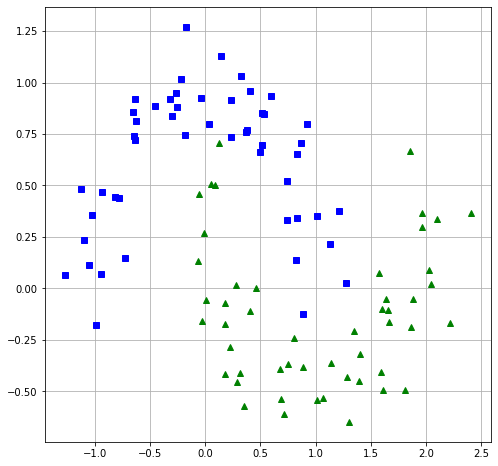

In [15]:
X,y = make_moons(n_samples = 100, noise = 0.15, random_state = 42)

idx_1 = np.where(y == 1)[0]
idx_0 = np.where(y == 0)[0]

fig,ax = plt.subplots(1,1,figsize = (8,8))
ax.plot(X[:,0][idx_1],X[:,1][idx_1],'g^')
ax.plot(X[:,0][idx_0],X[:,1][idx_0],'bs')
ax.grid()


The above dataset is impossible to be linearly classified, hence it is required that we change the dimension of this by adding in a polynomial

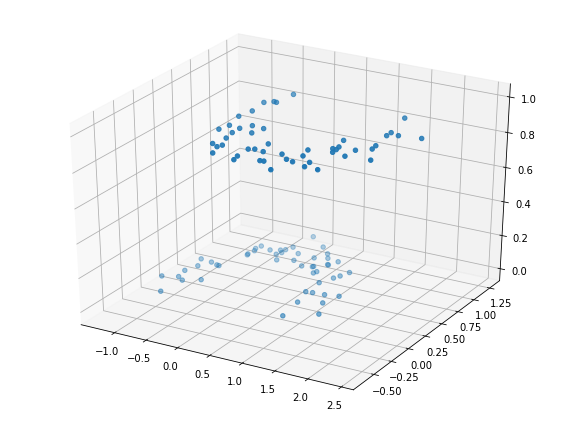

In [16]:
from mpl_toolkits import mplot3d

fig = plt.figure(figsize=(10, 7.5))
ax = plt.axes(projection='3d') 
#ax.plot3D(X[:,0],X[:,1],y,'gray')
ax.scatter3D(X[:,0],X[:,1],y,cmap = 'viridis')


In [17]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

polynomial_svm_clf = Pipeline([
    ('polyfeatures',PolynomialFeatures(degree=3)),
     ('scaler',StandardScaler()),
     ('svm_clf',LinearSVC(C=10,loss = 'hinge'))
])

In [18]:
polynomial_svm_clf.fit(X,y)

C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Pipeline(memory=None,
         steps=[('polyfeatures',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 LinearSVC(C=10, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=1000, multi_class='ovr',
                           penalty='l2', random_state=None, tol=0.0001,
                           verbose=0))],
         verbose=False)

In [19]:
dir(polynomial_svm_clf)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_estimator_type',
 '_final_estimator',
 '_fit',
 '_get_param_names',
 '_get_params',
 '_get_tags',
 '_inverse_transform',
 '_iter',
 '_log_message',
 '_pairwise',
 '_replace_estimator',
 '_required_parameters',
 '_set_params',
 '_transform',
 '_validate_names',
 '_validate_steps',
 'classes_',
 'decision_function',
 'fit',
 'fit_predict',
 'fit_transform',
 'get_params',
 'inverse_transform',
 'memory',
 'named_steps',
 'predict',
 'predict_log_proba',
 'predict_proba',
 'score',
 'set_params',
 'steps',
 'transform',
 've

In [20]:
polynomial_svm_clf.get_params()

{'memory': None,
 'steps': [('polyfeatures',
   PolynomialFeatures(degree=3, include_bias=True, interaction_only=False,
                      order='C')),
  ('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)),
  ('svm_clf', LinearSVC(C=10, class_weight=None, dual=True, fit_intercept=True,
             intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
             penalty='l2', random_state=None, tol=0.0001, verbose=0))],
 'verbose': False,
 'polyfeatures': PolynomialFeatures(degree=3, include_bias=True, interaction_only=False,
                    order='C'),
 'scaler': StandardScaler(copy=True, with_mean=True, with_std=True),
 'svm_clf': LinearSVC(C=10, class_weight=None, dual=True, fit_intercept=True,
           intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
           penalty='l2', random_state=None, tol=0.0001, verbose=0),
 'polyfeatures__degree': 3,
 'polyfeatures__include_bias': True,
 'polyfeatures__interaction_only': Fals

In [21]:
polynomial_svm_clf.get_params()['svm_clf'].coef_

array([[ 0.        , -0.46535845, -0.12013109, -5.01205409, -1.54692522,
         0.59312762,  6.61413321,  0.10469994,  1.39742809, -2.86714529]])

In [22]:
scaler_plot = StandardScaler()
X_scaled = scaler_plot.fit_transform(X)
X_scaled

array([[ 1.2288319 , -1.45680539],
       [-0.46341168,  0.5158751 ],
       [ 0.26652612, -1.21498185],
       [-1.78655886, -0.01424789],
       [-1.37234475, -0.193244  ],
       [-1.29483672,  1.21475044],
       [-0.30969263,  0.97191709],
       [ 0.98515796, -1.3765251 ],
       [ 0.40462952,  0.92037829],
       [ 0.41735682, -0.7344115 ],
       [-0.1387788 ,  1.04134997],
       [-0.92160698,  1.3422951 ],
       [ 0.87924151, -1.76986871],
       [-1.26906087,  1.33690337],
       [ 1.62319751,  0.10601539],
       [ 0.78122265,  0.26387389],
       [ 0.70266053, -1.19868072],
       [ 0.62278892, -1.54291373],
       [-0.01243448,  0.82690336],
       [-0.85231282,  1.26601374],
       [-0.63553453, -0.22415248],
       [ 1.51333936, -0.85331953],
       [-0.52823928,  1.09901505],
       [-1.7085747 ,  0.22557657],
       [-0.05445585, -0.47747725],
       [-0.11049293,  1.41352991],
       [-1.60473273,  0.44469157],
       [ 1.68733848, -0.30511962],
       [ 0.25705094,

In [23]:
poly3 = PolynomialFeatures(degree = 3)
Xpoly = poly3.fit_transform(X_scaled)
Xpoly

array([[ 1.00000000e+00,  1.22883190e+00, -1.45680539e+00,
         1.51002785e+00, -1.79016894e+00,  2.12228194e+00,
         1.85557040e+00, -2.19981671e+00,  2.60792776e+00,
        -3.09175178e+00],
       [ 1.00000000e+00, -4.63411675e-01,  5.15875098e-01,
         2.14750381e-01, -2.39062543e-01,  2.66127116e-01,
        -9.95178337e-02,  1.10784374e-01, -1.23326413e-01,
         1.37288352e-01],
       [ 1.00000000e+00,  2.66526124e-01, -1.21498185e+00,
         7.10361748e-02, -3.23824404e-01,  1.47618090e+00,
         1.89329964e-02, -8.63076633e-02,  3.93440774e-01,
        -1.79353301e+00],
       [ 1.00000000e+00, -1.78655886e+00, -1.42478945e-02,
         3.19179257e+00,  2.54547022e-02,  2.03002498e-04,
        -5.70232529e+00, -4.54763238e-02, -3.62675912e-04,
        -2.89235819e-06],
       [ 1.00000000e+00, -1.37234475e+00, -1.93243996e-01,
         1.88333012e+00,  2.65197384e-01,  3.73432420e-02,
        -2.58457822e+00, -3.63942239e-01, -5.12478023e-02,
        -7.

In [24]:
svm_clf_plot = LinearSVC(C = 10,loss = 'hinge')
svm_clf_plot.fit(Xpoly,y)

LinearSVC(C=10, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=None, tol=0.0001, verbose=0)

In [25]:
svm_clf_plot.predict(Xpoly)

array([1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1], dtype=int64)

In [26]:
y

array([1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1], dtype=int64)

In [27]:
#plot the prediction contours
axes_limits = [-1.5,2.5,-1,1.5]
x0s = np.linspace(axes_limits[0],axes_limits[1],100)
x1s = np.linspace(axes_limits[2],axes_limits[3],100)
x0,x1 = np.meshgrid(x0s,x1s)
X = np.c_[x0.ravel(),x1.ravel()]
y_pred = polynomial_svm_clf.predict(X).reshape(x0.shape)
y_pred

array([[0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       ...,
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1]], dtype=int64)

In [28]:
ydecision = polynomial_svm_clf.decision_function(X).reshape(x0.shape)

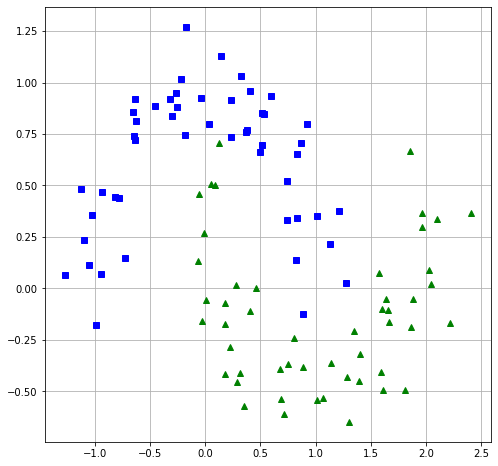

In [29]:
X,y = make_moons(n_samples = 100, noise = 0.15, random_state = 42)

idx_1 = np.where(y == 1)[0]
idx_0 = np.where(y == 0)[0]

fig,ax = plt.subplots(1,1,figsize = (8,8))
ax.plot(X[:,0][idx_1],X[:,1][idx_1],'g^')
ax.plot(X[:,0][idx_0],X[:,1][idx_0],'bs')
ax.grid()

In [30]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

polynomial_svm_clf = Pipeline([
    ('polyfeatures',PolynomialFeatures(degree=3)),
     ('scaler',StandardScaler()),
     ('svm_clf',LinearSVC(C=10,loss = 'hinge'))
])
polynomial_svm_clf.fit(X,y)

C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Pipeline(memory=None,
         steps=[('polyfeatures',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 LinearSVC(C=10, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=1000, multi_class='ovr',
                           penalty='l2', random_state=None, tol=0.0001,
                           verbose=0))],
         verbose=False)

In [31]:
axes_limits = [-1.5,2.5,-1,1.5]
x0s = np.linspace(axes_limits[0],axes_limits[1],100)
x1s = np.linspace(axes_limits[2],axes_limits[3],100)
x0,x1 = np.meshgrid(x0s,x1s)
X = np.c_[x0.ravel(),x1.ravel()]
y_pred = polynomial_svm_clf.predict(X).reshape(x0.shape)
y_pred

array([[0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       ...,
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1]], dtype=int64)

In [32]:
ydecision = polynomial_svm_clf.decision_function(X).reshape(x0.shape)

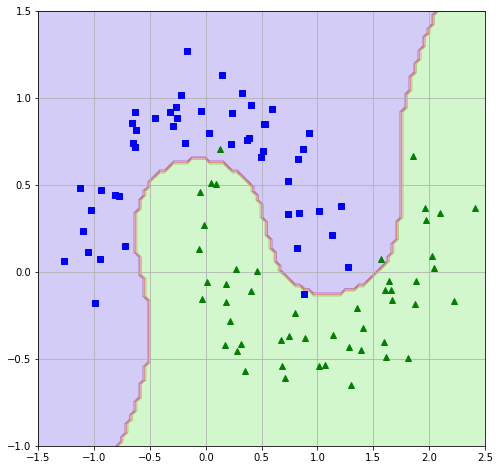

In [33]:
X,y = make_moons(n_samples = 100, noise = 0.15, random_state = 42)

idx_1 = np.where(y == 1)[0]
idx_0 = np.where(y == 0)[0]

fig,ax = plt.subplots(1,1,figsize = (8,8))
ax.plot(X[:,0][idx_1],X[:,1][idx_1],'g^')
ax.plot(X[:,0][idx_0],X[:,1][idx_0],'bs')
ax.contourf(x0,x1,y_pred,cmap = plt.cm.brg,alpha = 0.2)
ax.grid()
#the boundary line is the line where wx + b = 0

<IPython.core.display.Javascript object>


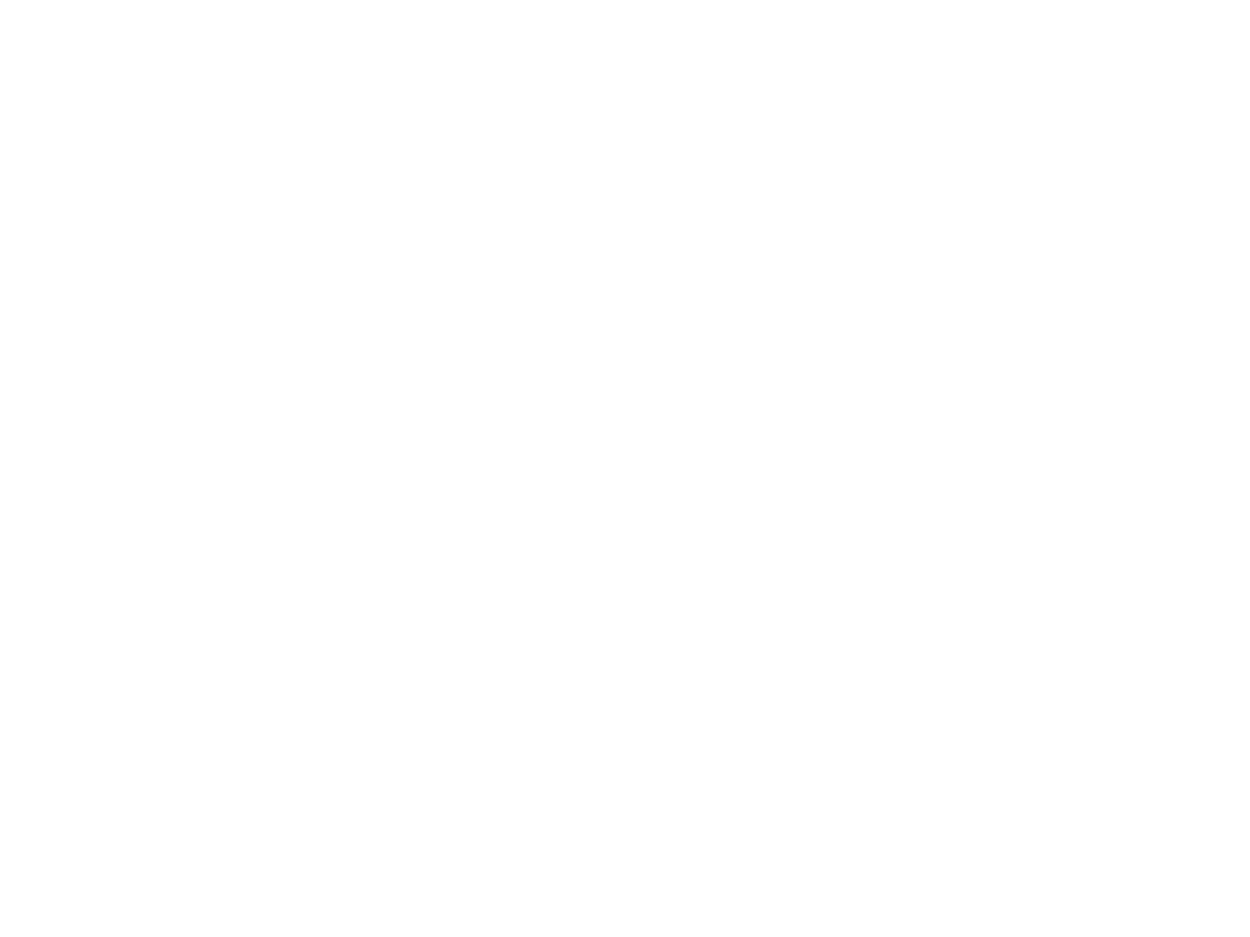

In [34]:
%matplotlib notebook
import matplotlib as mpl
from mpl_toolkits import mplot3d
fig = plt.figure(figsize=(10, 7.5))
ax = plt.axes(projection='3d')

ax.plot_surface(x0,x1,y_pred,cmap=mpl.cm.coolwarm)
plt.show()

In [35]:
from sklearn.svm import SVC
X,y = make_moons(n_samples = 100, noise = 0.15, random_state = 42)

poly_kernel_svm_clf = Pipeline([
    ('scaler',StandardScaler()),
    ('svm-clf',SVC(kernel = 'poly',degree= 3, coef0 = 1, C= 5))
])

poly_kernel_svm_clf.fit(X,y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm-clf',
                 SVC(C=5, cache_size=200, class_weight=None, coef0=1,
                     decision_function_shape='ovr', degree=3,
                     gamma='auto_deprecated', kernel='poly', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

**Coef0 is the intercept term of a polynomial equation in this case**

In [36]:
xaxislims = [-1.5,2.5,-1,1.5]
x0s = np.linspace(xaxislims[0],xaxislims[1],100)
x1s = np.linspace(xaxislims[2],xaxislims[3],100)
x0,x1 = np.meshgrid(x0s,x1s)
X_samples = np.c_[x0.ravel(),x1.ravel()]
y_predicted = poly_kernel_svm_clf.predict(X_samples).reshape(x0.shape)
y_predicted

array([[0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       ...,
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1]], dtype=int64)

In [37]:


poly_kernel_svm_clf_10 = Pipeline([
    ('scaler',StandardScaler()),
    ('svm-clf',SVC(kernel = 'poly',degree= 10, coef0 = 1, C= 5))
])

poly_kernel_svm_clf_10.fit(X,y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm-clf',
                 SVC(C=5, cache_size=200, class_weight=None, coef0=1,
                     decision_function_shape='ovr', degree=10,
                     gamma='auto_deprecated', kernel='poly', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [38]:
xaxislims = [-1.5,2.5,-1,1.5]
x0s = np.linspace(xaxislims[0],xaxislims[1],100)
x1s = np.linspace(xaxislims[2],xaxislims[3],100)
x0,x1 = np.meshgrid(x0s,x1s)
X_samples = np.c_[x0.ravel(),x1.ravel()]
y_predicted_10 = poly_kernel_svm_clf_10.predict(X_samples).reshape(x0.shape)
y_predicted_10

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [0, 0, 0, ..., 0, 1, 1],
       [0, 0, 0, ..., 0, 1, 1],
       [0, 0, 0, ..., 0, 0, 1]], dtype=int64)

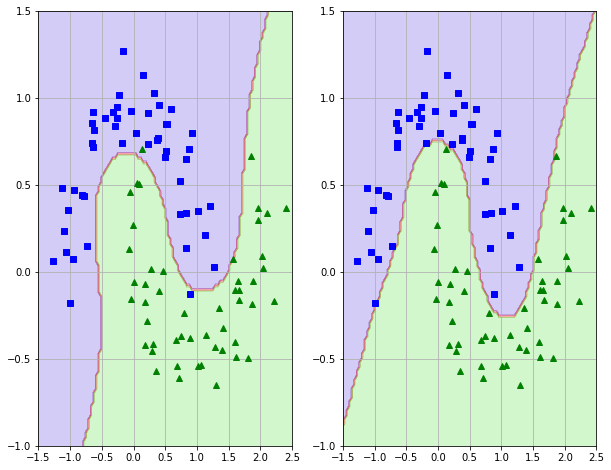

In [39]:
%matplotlib inline
idx_0 = np.where(y == 0)[0]
idx_1 = np.where(y == 1)[0]
fig,ax = plt.subplots(1,2,figsize = (10,8))
ax[0].plot(X[:,0][idx_0],X[:,1][idx_0],'bs')
ax[0].plot(X[:,0][idx_1],X[:,1][idx_1],'g^')
ax[1].plot(X[:,0][idx_0],X[:,1][idx_0],'bs')
ax[1].plot(X[:,0][idx_1],X[:,1][idx_1],'g^')
ax[0].contourf(x0,x1,y_predicted,cmap = plt.cm.brg,alpha = 0.2)
ax[1].contourf(x0,x1,y_predicted_10,cmap = plt.cm.brg,alpha = 0.2)
ax[0].grid()
ax[1].grid()

In [40]:
poly_kernel_svm_clf_3 = Pipeline([
    ('scaler',StandardScaler()),
    ('svm-clf',SVC(kernel = 'poly',degree= 3, coef0 = 1, C= 50))
])

poly_kernel_svm_clf_3.fit(X,y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm-clf',
                 SVC(C=50, cache_size=200, class_weight=None, coef0=1,
                     decision_function_shape='ovr', degree=3,
                     gamma='auto_deprecated', kernel='poly', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

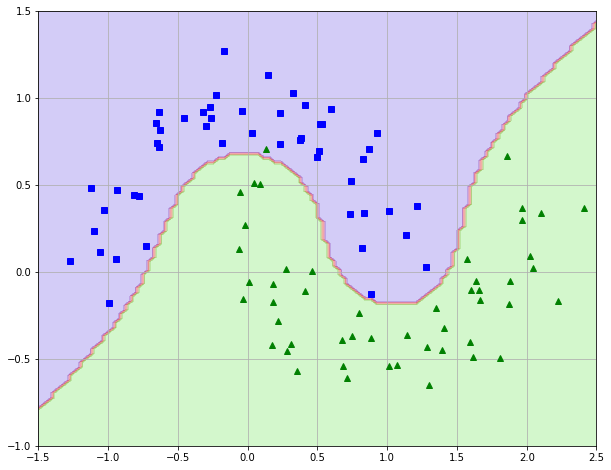

In [41]:
xaxislims = [-1.5,2.5,-1,1.5]
x0s = np.linspace(xaxislims[0],xaxislims[1],100)
x1s = np.linspace(xaxislims[2],xaxislims[3],100)
x0,x1 = np.meshgrid(x0s,x1s)
X_samples = np.c_[x0.ravel(),x1.ravel()]
y_predicted = poly_kernel_svm_clf_3.predict(X_samples).reshape(x0.shape)

%matplotlib inline
idx_0 = np.where(y == 0)[0]
idx_1 = np.where(y == 1)[0]
fig,ax = plt.subplots(1,1,figsize = (10,8))
ax.plot(X[:,0][idx_0],X[:,1][idx_0],'bs')
ax.plot(X[:,0][idx_1],X[:,1][idx_1],'g^')

ax.contourf(x0,x1,y_predicted,cmap = plt.cm.brg,alpha = 0.2)

ax.grid()


The above plot is with C = 50 and a degree of 3, while the degree 3 with C=5 plot has also been plot earlier. Its clearly seen that increasing C has resulted in higher accuracy however margin between the 2 classes has decreases. Here too C acts in the same context of SVC(kernel = 'rbf', gamma = xxx, C = xxx)

<h3>Similarity Features</h3>

Use a similarity function to measure how much each instance resembles a particular landmark.

To a given 1d dataset, we add landmarks that we want to measure the similarity from. Then for each point on the single dimension, we measure the similarity from the 2 landmarks. 

In [ ]:
ld1 = -2
ld2 = 1
gamma = 0.3
x1d = np.linspace(min(list(range(-4,5))),max(list(range(-4,5))),100)
similarity_from_ld1 = np.exp(-1.5*((np.array(x1d) - ld1))**2)
similarity_from_ld2 = np.exp(-1.5*((np.array(x1d) - ld2))**2)

In [ ]:
fig,ax = plt.subplots(1,1,figsize = (8,5))
ax.plot(x1d,[0]*len(x1d),'b-')
ax.plot(x1d,similarity_from_ld1,'r-')
ax.plot(x1d,similarity_from_ld2,'g-')
ax.grid()

As Gamma increases, the similarity bell curves increase as the simlairyt values tend to come closer to zero in a smaller range as the exponent is an inverse here. Hence when gamma increases, the influence a particular landmark has on other landmarks decreases too.

Above we have only selected a single landmark, however we can make each instance in the dataset a landmark. This will create many dimensions and thus increase the chances of making the training set linearly separable. However adding landmarks like this makes it have m instances and m features.
Instead the kernel trick allows to make the dataset linearly separable without having to add additional similarity features

In [ ]:
gammalist = [0.1,5]
clist = [0.001,1000]
idx_0 = np.where(y == 0)[0]
idx_1 = np.where(y == 1)[0]
fig,ax = plt.subplots(2,2,figsize = (6,5))
axesrownum = 0
axescolnum = 0
for gamma in gammalist:
    if axescolnum != 0:
        axesrownum +=1
        axescolnum = 0
    
    for c in clist:
        xaxislims = [-1.5,2.5,-1,1.5]
        ax[axesrownum,axescolnum].plot(X[:,0][idx_0],X[:,1][idx_0],'bs')
        ax[axesrownum,axescolnum].plot(X[:,0][idx_1],X[:,1][idx_1],'g^')
        x0s = np.linspace(xaxislims[0],xaxislims[1],100)
        x1s = np.linspace(xaxislims[2],xaxislims[3],100)
        x0,x1 = np.meshgrid(x0s,x1s)
        X_samples = np.c_[x0.ravel(),x1.ravel()]
        rbf_kernel_svm_clf = Pipeline([
            ('scaler',StandardScaler()),
            ('svm_clf',SVC(kernel = 'rbf',gamma = gamma,C = c))
        ])
        rbf_kernel_svm_clf.fit(X,y)           
        y_predicted = rbf_kernel_svm_clf.predict(X_samples).reshape(x0.shape)
        ax[axesrownum,axescolnum].contourf(x0,x1,y_predicted,cmap = plt.cm.brg,alpha = 0.2)
        axescolnum +=1

In this kernel, **notice that as gamma increases, the decision boundaries tend to be irregular and overfit** This is because a larger gamma causes the similarity bell curve to become narrower hence for a particular instance, it will only have high similarity with the values close to it, and influence only the instances close to it. Hence the decision boundary is also concentrated in that area. 

**Hence if it is required to reduce overfitting of a svm with a RBF kernel, you can reduce the gamma value**


**Relationship between C and gamma**

Notice how in the last 2 images, the gamma is high. With a lower C value, it results in a higher sized margin between the 2 classifications but lower accuracy. But with the last image, increasing C has resulted in a smaller margin but higher accuracy.

In third image, the decision boundary doesnt encapsulate all the blue points, but has a larger margin. In the final image, the decision boundary reaches and encapsulates the blues ones too. However now, the margin between the blue and green points is much smaller


<h5>LinearSVC vs SVC(kernel = 'linear')</h5>
LinearSVC implements liblinear while SVC with kernel implements libsvm. Liblinear does one vs all, while libsvm does one vs one. Also liblinear regularizes the intercept(bias term).

LinearSVC takes a long time if you want high precision and this is controlled by the tolerance hyperparameter. LinearSVC has a computational complexity of O(mxn) while SVC has a computational complexity of OSVC, simply doubling the number of training instances will result in at least a 4times increase in computational time. 

**SVC should be used for complex but small or medium training sets**


<h2> SVM Regression </h2>

SVM algorithm supports both linear/non linear classification(SVM classification) and linear/non linear regression (SVM Regression). 

Instead of trying to separate all instances using a street, we try to fit everything within the street with minimal margin violations. 

LinearSVR is equivalent to LinearSVC

SVR(kernel = xxx) is equivalent to SVC(kernel = xxx)

In [ ]:
np.random.seed(42)
m = 50
X = 2*np.random.rand(m,1)
y = (4 + 3*X + np.random.randn(m,1)).ravel()

In [ ]:
#linear SVM regression
from sklearn.svm import LinearSVR

svm_reg = LinearSVR(epsilon = 1.5, random_state = 42)
svm_reg.fit(X,y)

In [ ]:
svm_reg1 = LinearSVR(epsilon = 1.5,random_state = 42)
svm_reg2 = LinearSVR(epsilon = 0.5,random_state = 42)
svm_reg1.fit(X,y)
svm_reg2.fit(X,y)

def findsupportvector(svm_reg,X,y):
    y_pred = svm_reg.predict(X)
    off_margin = (np.abs(y - y_pred) >= svm_reg.epsilon)
    return np.argwhere(off_margin)

svm_reg1.support_ = findsupportvector(svm_reg1, X,y)
svm_reg2.support_ = findsupportvector(svm_reg2, X,y)


In [ ]:
 y = y.reshape(-1,1)

In [ ]:
axes_lims = [0,2,3,11]
X_values = np.linspace(axes_lims[0],axes_lims[1],100).reshape(100,1)
y_predict_1 = svm_reg1.predict(X_values)
fig,ax = plt.subplots(1,1,figsize = (9,4))
ax.plot(X_values,y_predict_1,'b-')
ax.plot(X_values,y_predict_1 - svm_reg1.epsilon,'k--')
ax.plot(X_values,y_predict_1 + svm_reg1.epsilon,'k--')
ax.scatter(X,y)
ax.scatter(X[svm_reg1.support_],y[svm_reg1.support_])
ax.title.set_text('Epsilon = 1.5')

In [ ]:
axes_lims = [0,2,3,11]
X_values = np.linspace(axes_lims[0],axes_lims[1],100).reshape(100,1)
y_predict_2 = svm_reg2.predict(X_values)
fig,ax = plt.subplots(1,1,figsize = (9,4))
ax.plot(X_values,y_predict_2,'b-')
ax.plot(X_values,y_predict_2 - svm_reg2.epsilon,'k--')
ax.plot(X_values,y_predict_2 + svm_reg2.epsilon,'k--')
ax.scatter(X,y)
ax.scatter(X[svm_reg2.support_],y[svm_reg2.support_])
ax.title.set_text('Epsilon = 0.5')

All the orange markers in above figures are outside the street

<h3> Summary </h3>
SVR and LinearSVR try to fit the maximum number of instances within the fitted line and the epsilon range.Everything else is outside the street.



<h3>Radial Basis Function kernel in SVC</h3>
Gamma defines how far the influence of a single training example reaches. 
C parameter trades off correct classification of training examples against maximization of the decision function's margin. **A larger C**, a smaller margin will be accepted if the decision function is better at classifying all training points correctly. **A lower C** results in a larger margin at the cost of training accuracy.

**Hence a higher C value increases the importance of classifying the instances correctly**

A smooth model **with lower gamma values** can be made more complex by increasing the importance of classiying each point correctly **with larger C values** 

GAMMA TRIES TO OVERFIT WITH INCREASING MAGNITUDE WHILE C TRIES TO PULL IT BACK AND MAKE IT LESS OVERFIT. 

- LinearSVC : increasing C, smaller margin, higher accuracy
- SVC(kernel = poly, C):increasing C, smaller margin, higher accuracy
- LinearSVR(epsilon): C has no significant role
- SVR(kernel = 'poly', C): C acts as a regularization term with C = 1/lambda
